In [2]:
!nvidia-smi

Tue Dec  9 04:29:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!ls /content

Fruit-1


In [4]:

!pip install ultralytics

In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import Image

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dNxr25TrLrDKQypb5pPx")
project = rf.workspace("kaumudi").project("fruit-detector-yahev-3wp34")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fruit-detector-1 in yolov11:: 100%|██████████| 35046/35046 [00:09<00:00, 3852.10it/s]


In [8]:
dataset.location

'/content/fruit-detector-1'

In [9]:
from google.colab import files


In [11]:
dataset.location

'/content/fruit-detector-1'

In [13]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [14]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fruit-detector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

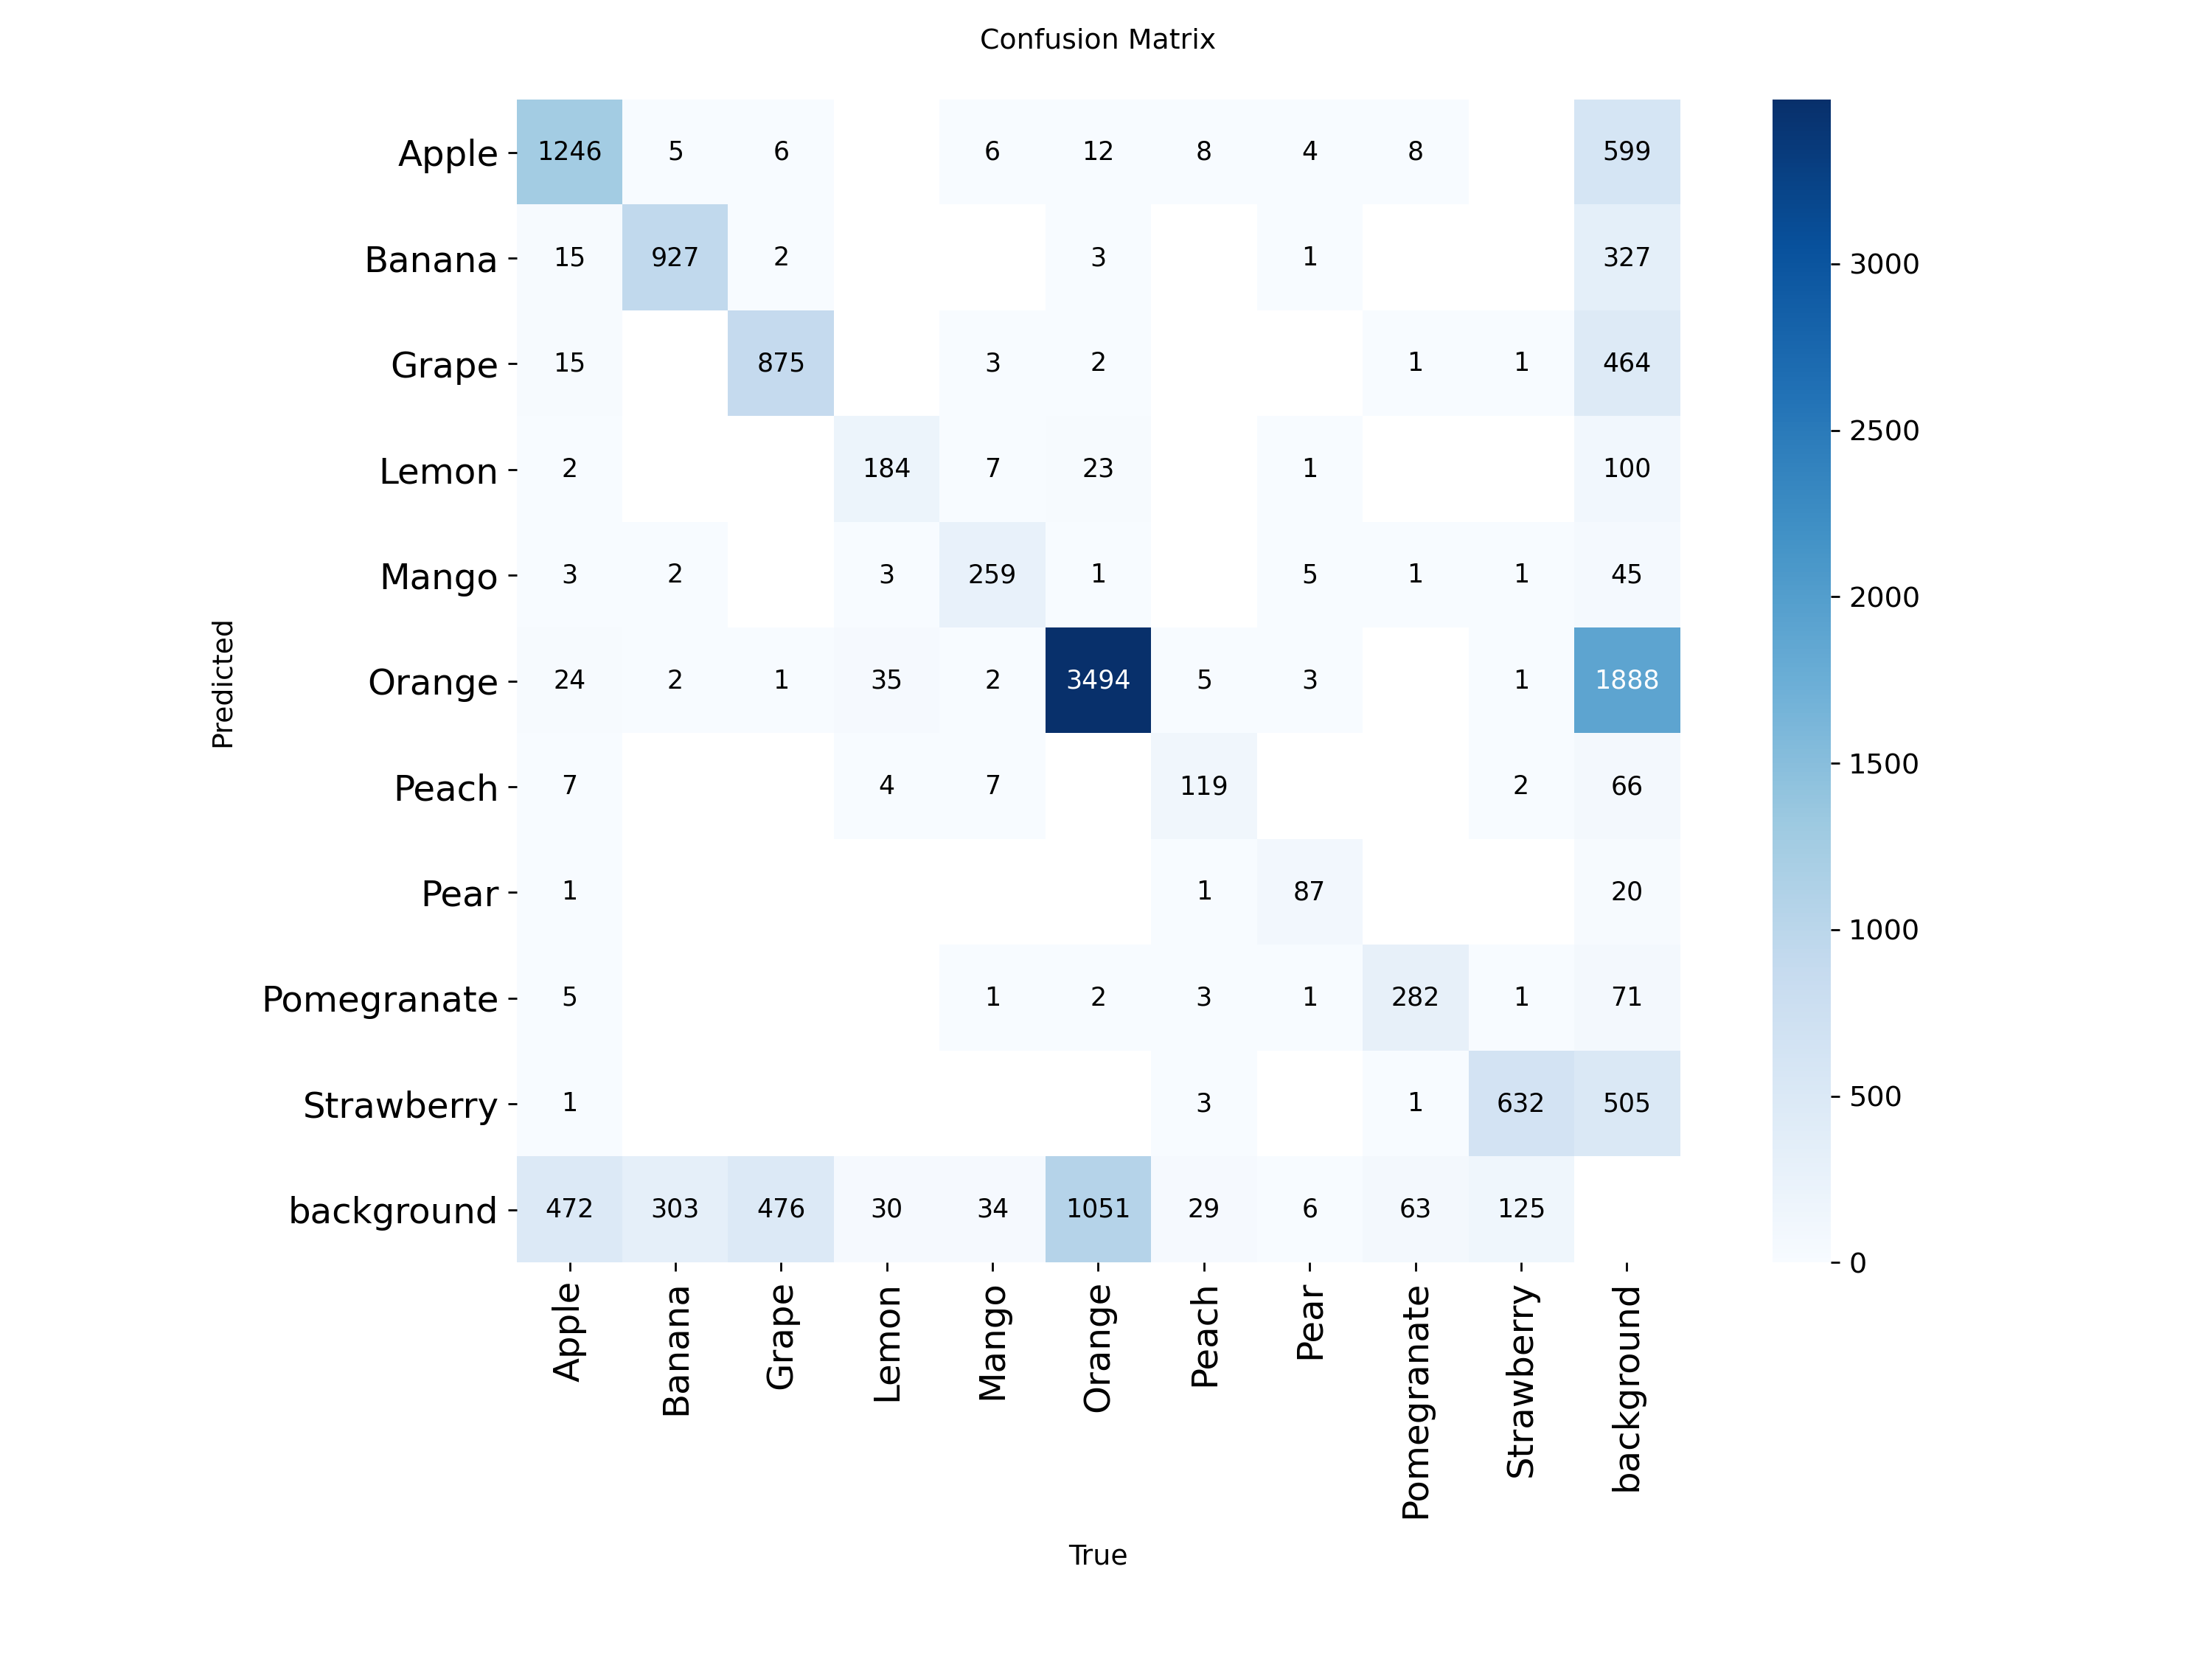

In [15]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

In [16]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1101.3±547.5 MB/s, size: 28.3 KB)
val: Scanning /content/fruit-detector-1/valid/labels.cache... 3207 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 3207/3207 49.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 201/201 6.4it/s 31.4s
                   all       3207      10948      0.768      0.715      0.781       0.62
                 Apple        691       1791      0.781      0.659      0.753       0.62
                Banana        670       1239      0.809      0.702      0.773      0.605
                 Grape        373       1360      0.754      0.597       0.67      0.524
                 Lemon        166        256      0.734      0.733      0.788      0.665
                 Mango        2

In [17]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs

image 1/1741 /content/fruit-detector-1/test/images/-00006_jpeg_jpg.rf.7a5e358820dc767d21bb0ff45256cec1.jpg: 640x640 1 Peach, 11.7ms
image 2/1741 /content/fruit-detector-1/test/images/-00010_jpeg_jpg.rf.26b531fee41ab2eeda6eef04d3bed45f.jpg: 640x640 2 Apples, 8.2ms
image 3/1741 /content/fruit-detector-1/test/images/-00015_jpeg_jpg.rf.e3282fed3ed92022f2c7ad8fad6dca6f.jpg: 640x640 1 Apple, 7.9ms
image 4/1741 /content/fruit-detector-1/test/images/-00021_jpeg_jpg.rf.01882ea112a2aa92c6b28fbe5c4f1635.jpg: 640x640 1 Apple, 8.0ms
image 5/1741 /content/fruit-detector-1/test/images/-00028_jpeg_jpg.rf.04b37034c2bccda3559d43090ba308db.jpg: 640x640 1 Apple, 7.9ms
image 6/1741 /content/fruit-detector-1/test/images/-00032_jpeg_jpg.rf.644a615036dcf815949c91eecd68078e.jpg: 640x640 1 Apple, 7.9ms
image 7/1741 /content/fruit-detector-1/test/i

In [19]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/mix.png" save=True

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/mix.png: 640x640 1 Orange, 11.2ms
Speed: 4.0ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict
